In [1]:
import pandas as pd
import model_selection_pipeline as pipeline
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, QuantileDMatrix, Booster, train
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


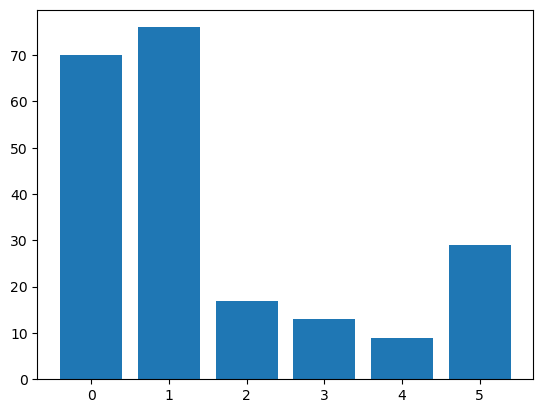

In [2]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [3]:
strategy_1 = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy_1)
X_new, y_new = oversample.fit_resample(X, y)

In [4]:
Counter(y_new)

Counter({2: 200, 3: 200, 4: 200, 5: 200, 0: 100, 1: 100})

<h1>Implementing SMOTE on the Cleaned Dataset

In [5]:
df = pd.read_csv('./datasets/train_cleaned.csv')

In [6]:
feature_list = ['Monthly_Inhand_Salary','Annual_Income', 'Amount_invested_monthly','Num_of_Delayed_Payment', 'Num_Bank_Accounts', 'Interest_Rate','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Credit_History_Age', 'Credit_Score']

In [7]:
subset_df = df[feature_list]

subset_df['Credit_Score'] = subset_df['Credit_Score'].map({'Good': 0, 'Poor': 1, 'Standard': 2})

X = subset_df[feature_list[:-1]].values
y = subset_df[["Credit_Score"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.3)

C:\Users\aarya\AppData\Local\Temp\ipykernel_26604\3279624015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Credit_Score'] = subset_df['Credit_Score'].map({'Good': 0, 'Poor': 1, 'Standard': 2})


In [8]:
dict(Counter(y_train["Credit_Score"]))

{2: 37222, 1: 20299, 0: 12479}

In [9]:
strategy = {1: 27000, 0: 27000}
sampler = SMOTE(sampling_strategy=strategy)

X_train_new, y_train_new = sampler.fit_resample(X_train, y_train)

In [10]:
import torch
from torch.utils.data import random_split, TensorDataset

X_train[0], X_train_new[0]

(array([1.17932333e+03, 1.75598800e+04, 2.45048230e+01, 6.00000000e+00,
        2.00000000e+00, 5.00000000e+00, 1.00000000e+00, 7.02000000e+00,
        2.37000000e+01, 2.24000000e+02]),
 array([1.17932333e+03, 1.75598800e+04, 2.45048230e+01, 6.00000000e+00,
        2.00000000e+00, 5.00000000e+00, 1.00000000e+00, 7.02000000e+00,
        2.37000000e+01, 2.24000000e+02]))

In [11]:
y_train_new["Credit_Score"].value_counts()

Credit_Score
2    37222
1    27000
0    27000
Name: count, dtype: int64

In [12]:
params = {
 'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 1e-1,
 'max_delta_step': 1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 350,
 'objective': 'binary:logistic',
 'reg_alpha': 9e-1,
 'reg_lambda': 0.8,
#  'scale_pos_weight': 1,
 'seed': 21,
#  'silent': 1,
 'subsample': 1,
}

# XGBClassifier().get_xgb_params()

In [13]:
rf_params = {
    'n_estimators': 200, # Number of trees in the forest
    'max_depth': 22, # Maximum depth of the tree
    'min_samples_split': 2, # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1, # Minimum number of samples required to be at a leaf node
    'max_features': 'sqrt', # Number of features to consider when looking for the best split
    'bootstrap': True, # Whether bootstrap samples are used when building trees
    'criterion': 'entropy' # Function to measure the quality of a split
}

RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# over_sampled_model = XGBClassifier(**params) - 0.76
over_sampled_model = OneVsRestClassifier(RandomForestClassifier()) # - F1 -> 0.8012
# over_sampled_model = OneVsRestClassifier(SVC(kernel='linear'))
over_sampled_model.fit(X_train_new, y_train_new)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [15]:
y_pred= over_sampled_model.predict(X_test)

In [16]:
scores = {
    "F1:": "{:.4f}".format(f1_score(y_test, y_pred, average='weighted')),
    "Precision:": "{:.4f}".format(precision_score(y_test, y_pred, average='weighted')),
    "Recall:": "{:.4f}".format(recall_score(y_test, y_pred, average='weighted')),
    "Accuracy:": "{:.4f}".format(accuracy_score(y_test, y_pred))
}
print(scores)

{'F1:': '0.8010', 'Precision:': '0.8019', 'Recall:': '0.8008', 'Accuracy:': '0.8008'}


In [17]:
CM = confusion_matrix(y_test, y_pred)

In [18]:
# Extracting TP, FP, TN, FN from the confusion matrix
cm_dic = {
    "True Negative" : None,
    "True Positive": None,
    "False Positive" : None,
    "False Negative" : None
}
try:
    cm_dic["True Negative"] = CM[0][0]
except IndexError:
    TN = 0
try:
    cm_dic["False Negative"] = CM[1][0]
except IndexError:
    FN = 0
try:
    cm_dic["True Positive"] = CM[1][1]
except IndexError:
    TP = 0
try:
    cm_dic["False Positive"] = CM[0][1]
except IndexError:
    FP = 0

cm_dic

{'True Negative': 4139,
 'True Positive': 7178,
 'False Positive': 20,
 'False Negative': 54}